#### 参数估计的不稳定性
---
#### 参数
参数通常是一个有助于描述数据集或是分布的量。它被用来约束模型的预测结果。例如，正态分布的均值就是一个参数；事实上，我们说正态分布通过它的均值和方差来<i>参数化</i>的。如果我们得到了从正态分布中抽取的一组样本的均值，我们也就获得该分布下的均值的估计值。类似地，一组观测集的均值是对隐含分布（通常认为是正态分布）的参数的估计值。其他参数还包括中位数、相对于其他数列的相关系数、标准差和数据集的其他所有度量。
#### 你永远不知道，你只是估计

当你从数据集中求得了平均值，你其实并不知道真正的平均值，而是尽你最大可能从数据集中估计出来平均值，估计的平均值可能有偏差。这对于估计的任何参数都是再正常不过。为了能更好地理解发生了什么，你需要通过观察估计的稳定性（标准差、置信区间）来确定你所估计的参数的准确程度。

#### 估计的不稳定性

每当我们面对一组观测集时，我们计算出来的参数仅仅只是一个估计值。随着我们进行更多地测量，或者随时间推移我们得到新的观测值，参数也会发生变化。我们通过观测集的不同子集，来观察参数的变化，从而量化估计的不确定性。例如，标准差描述了一个集合的均值与每一个观察值的均值（也就是每个观察值本身）的差异。在金融应用中，数据经常以时间序列的方式出现。这时我们可以在不同的时间上的估计参数,比方说过去30天。通过改变时间窗口来观察这个移动估计值的波动程度，我们可以计算出被估计参数的不稳定性。
#### 均值和标准差举例
首先来看一些基于正态分布的样本。我们知道正态分布的均值是0，标准差是1.但是如果我们是通过观测集来测量参数，得到的结果仅仅是逼近于0和1。我们来看一下，这些估计是如何随着获取的样本数越来越多而改变的：

-0.269516110326
0.0271090734904
-0.0206160591117
-0.0386439735132


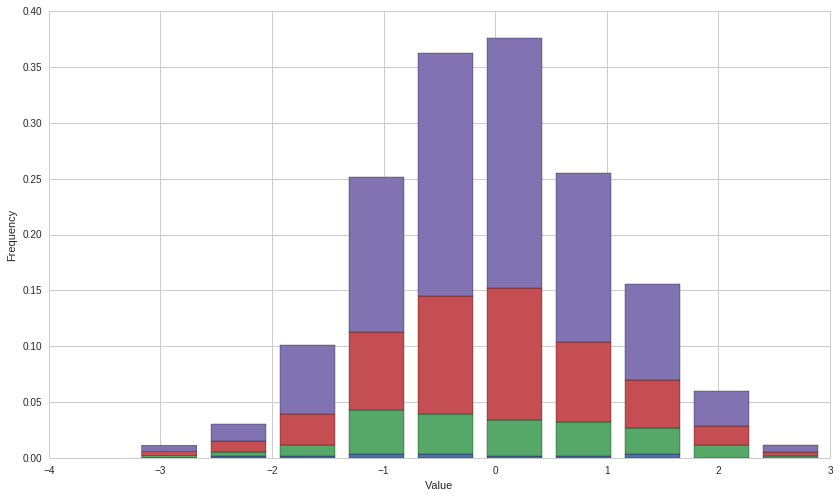

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 设置随机数种子，这样我们不必每次都生成新的随机数，可以在同一批随机数中处理数据
np.random.seed(123)

normal = np.random.randn(500)
print np.mean(normal[:10])
print np.mean(normal[:100])
print np.mean(normal[:250])
print np.mean(normal)

# 绘制数据的堆叠直方图
plt.hist([normal[:10], normal[:100], normal[:250], normal], normed=1, histtype='bar', stacked=True);
plt.ylabel('Frequency')
plt.xlabel('Value');

In [24]:
print np.std(normal[:10])
print np.std(normal[:100])
print np.std(normal[:250])
print np.std(normal)

1.2363048015
1.12824047048
1.01746043683
1.00320285616


从上面的例子中我们知道：尽管随着样本数量的增加，均值和标准差越来越接近0和1的概率也大大增加，但我们并不总能通过更多的样本来让参数估计的更准确。无论我们的预期是什么，我们总能得到一个有不同的结果。我们的目标通常是计算结果与预期显著不同的概率。
对于时间序列数据，我们通常只关心数据的连续子集。移动（也有作“滚动”）平均线表示了在每个时点上的前$n$天数据的平均值。之后我们会来计算一只股票价格的90天移动平均线，并绘制出它是如何变化。刚开始没有结果，因为我们首先要累计至少90天的数据。
#### 非正态的潜在分布（即总体分布）举例

如果潜在数据（即总体数据）不是呈正态分布的，那么均值将非常具有欺骗性的。 因此检验数据的正态性是非常重要的。我们将使用Jarque-Bera（哈尔克-贝拉）检验来举个例子：

mean: 0.00984758128215
standard deviation: 5.06070874011


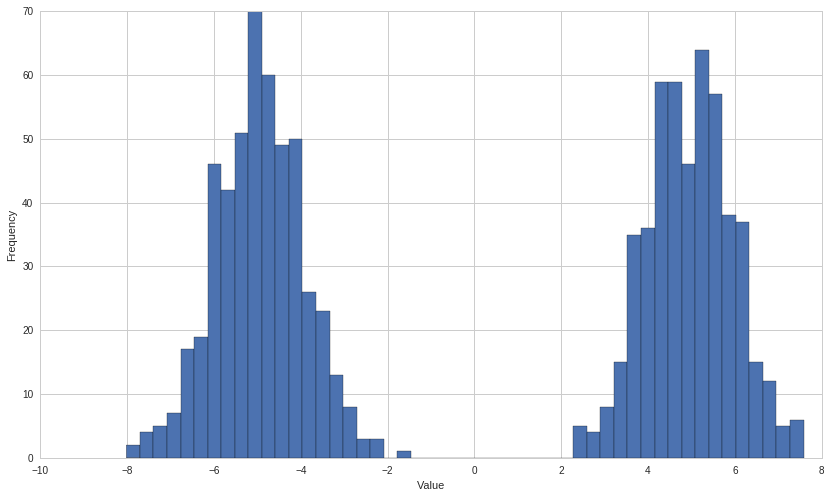

In [25]:
# 生成来自于双峰分布的一些数据
def bimodal(n):
    X = np.zeros((n))
    for i in range(n):
        if np.random.binomial(1, 0.5) == 0:
            X[i] = np.random.normal(-5, 1)
        else:
            X[i] =  np.random.normal(5, 1)
    return X
            
X = bimodal(1000)

#绘制出这些数据来进行观察
plt.hist(X, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value')
print 'mean:', np.mean(X)
print 'standard deviation:', np.std(X)

可以肯定的是，均值并不能对数据中发生了什么提供任何信息。我们把全部数据压缩进了一个单一的估计值，这样做的结果是丢失了很多信息。如果我们关于正态分布的假设是正确的，那么分布应该是像下面这样：

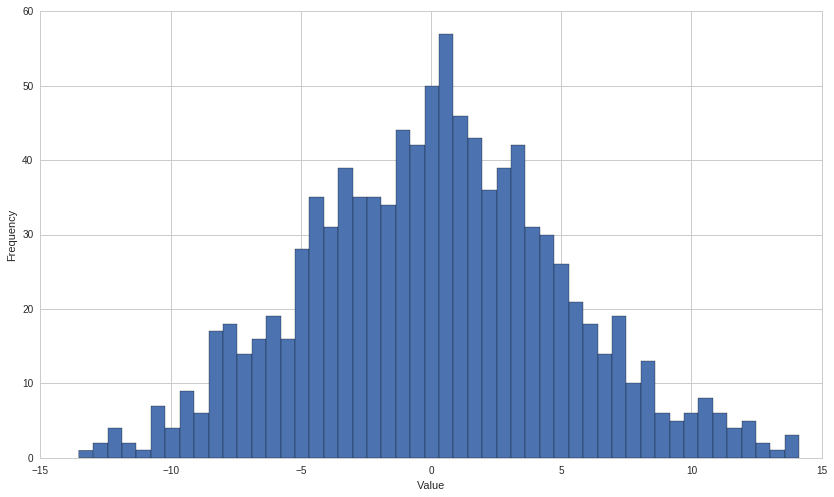

In [26]:
mu = np.mean(X)
sigma = np.std(X)

N = np.random.normal(mu, sigma, 1000)

plt.hist(N, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value');

现在对我们的数据使用Jarque-Bera（哈尔克-贝拉）正态性检验，P值的显著性代表了非正态。

In [27]:
from statsmodels.stats.stattools import jarque_bera

jarque_bera(X)

(142.12550136207705,
 1.3735343038981241e-31,
 -0.007644415681800414,
 1.1531707484649847)

P < 0.05，我们因此得到变量X非正态的结论。这避免了我们意外地去做出可怕的预测。
#### 夏普比率举例
常被用来描述资产和投资组合的表现的一个统计量是夏普比率，它衡量的是：相对于无风险回报来源诸如国债，投资组合实现的每单位额外风险所对应的超额收益：
$$R = \frac{E[r_a - r_b]}{\sqrt{Var(r_a - r_b)}}$$
其中$r_a$是我们的资产收益率，$r_b$是无风险收益率。和均值和方差一样，我们可以计算滚动滚动夏普比率，并观察随着时间推移它是如何变化的。

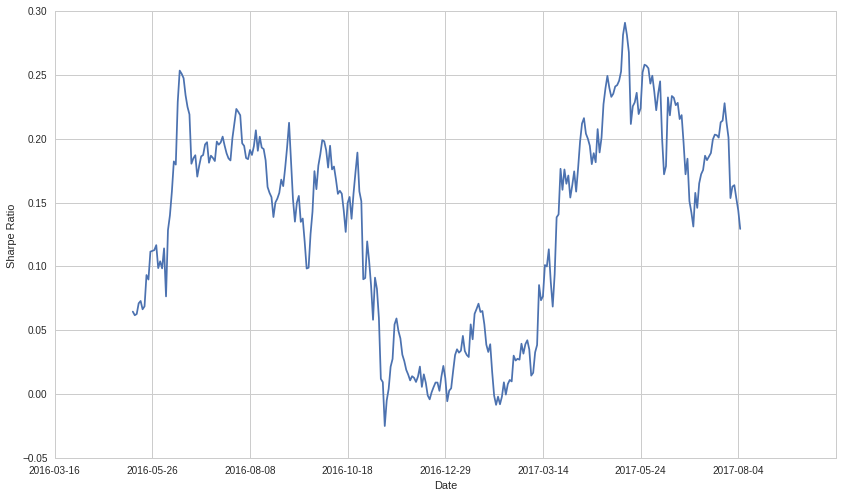

In [28]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

start = '2016-01-01'
end = '2018-01-01'
# 使用追踪3月期国债的ETF收益率作为我们的无风险收益率
treasury_ret = get_pricing('BIL', fields='price', start_date=start, end_date=end).pct_change()[1:]
pricing = get_pricing('AMZN', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:] # 得到资产收益率

# 计算滚动夏普比率
running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

# 绘制截止到时间序列数据集结束前100天的滚动夏普比率
_, ax1 = plt.subplots()
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100]);
ticks = ax1.get_xticks()
ax1.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # x轴日期标签
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio');

夏普比率看起来相当不稳定，显然将夏普比率作为单一的值来看待，对预测未来是毫无帮助的。相反，我们可以计算它的均值和标准差，然后来观察是否这样做可以帮助我们预测未来100天的夏普比率。

滚动夏普比率均值: 0.135138822356
滚动夏普比率标准差: 0.0799941488462


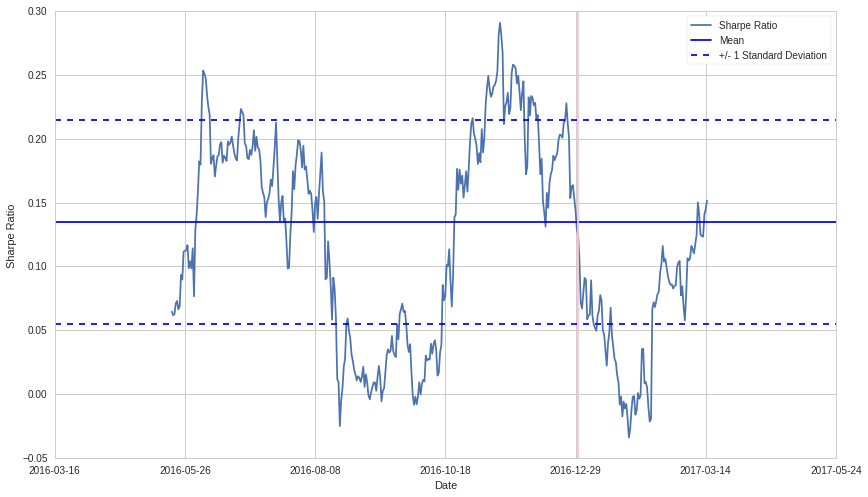

In [29]:
# 计算截止到时间序列数据集结束前100天的滚动夏普比率均值和标准差
mean_rs = np.mean(running_sharpe[:-100])
std_rs = np.std(running_sharpe[:-100])

# 绘制滚动夏普比率
_, ax2 = plt.subplots()
ax2.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # x轴日期标签
ax2.plot(range(90, len(returns)), running_sharpe)

# 绘制均值以及 +/- 1 个标准差的区间边界
ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs, linestyle='--')
ax2.axhline(mean_rs - std_rs, linestyle='--')

# 绘制我们计算均值和标准差的地方
# 在这之后的部分是样本之外的，我们正在拿它和被估计的均值和标准差进行比较
ax2.axvline(len(returns) - 100, color='pink');
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

print '滚动夏普比率均值:', mean_rs
print '滚动夏普比率标准差:', std_rs

可以看到标准差差不多是整个范围的四分之一，因此来说夏普比率是非常不稳定的。当我们向前看样本外的数据会发现，由于考虑了标准差，我们得到了比起只使用均值更好的预测效果，尽管仍然能够观察到超出正负一个标准差范围的数据。我们也可以计算夏普比率的滚动平均值来尝试跟踪它的趋势，但在本例中我们主要讨论的是标准差。
#### 移动平均值举例

假设你取过往时间窗口内的平均值，你要怎样确定这个被估计的平均值的标准差？我们从取90天移动平均值的例子开始说起：

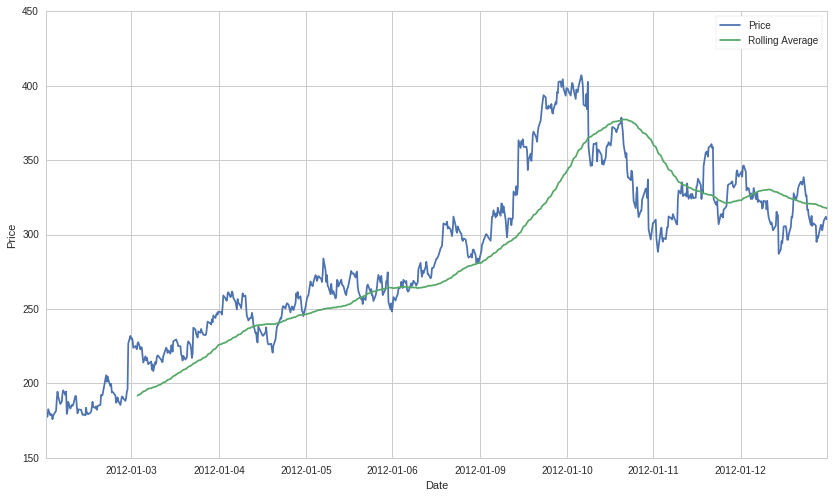

In [12]:
# 加载股价的时间序列
start = '2012-01-01'
end = '2015-01-01'
pricing = get_pricing('AMZN', fields='price', start_date=start, end_date=end)

# 计算每天的过去90天移动平均价
mu = pricing.rolling(window=90,center=False).mean()

# 绘制股价
_, ax1 = plt.subplots()
ax1.plot(pricing)
ticks = range(0, len(pricing))
ax1.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.ylabel('Price')
plt.xlabel('Date')

# 绘制滚动平均值
ax1.plot(mu);
plt.legend(['Price','Rolling Average']);

这让我们看到了平均值的不稳定性/标准误差，并有助于预测股价的未来变化。我们可以通过计算移动平均值的均值和标准差来量化这种变化。

In [69]:
print '移动平均值的均值:', np.mean(mu)
print '移动平均值的标准差:', np.std(mu)

移动平均值的均值: 288.398888688
移动平均值的标准差: 51.1197339626


实际上，我们用来量化变化的标准差，其本身也在变化。下面我们绘制出移动标准差（90天窗口），并计算它的均值的标准差。

移动标准差的均值: 17.3983064554
移动标准差的标准差: 7.54674761972


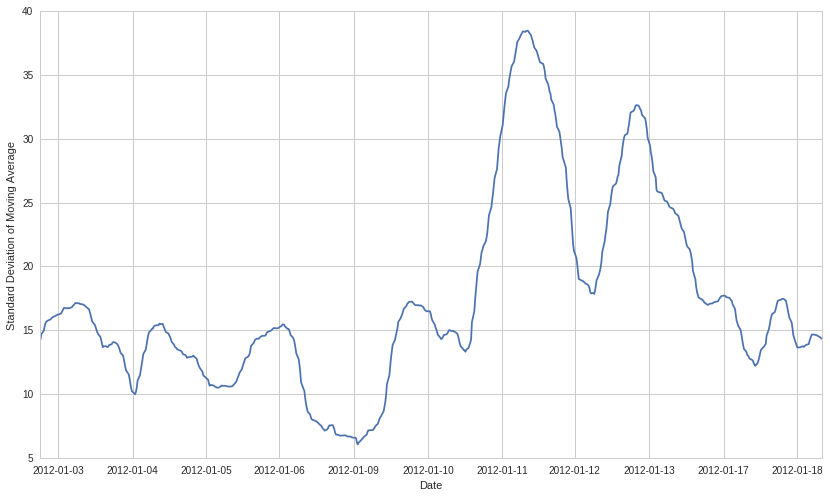

In [14]:
# 计算移动标准差
std = pricing.rolling(window=90,center=False).std()

# 绘制移动标准差
_, ax2 = plt.subplots()
ax2.plot(std)
ax2.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.ylabel('Standard Deviation of Moving Average')
plt.xlabel('Date')

print '移动标准差的均值:', np.mean(std)
print '移动标准差的标准差:', np.std(std)

为了解这个标准差的变化对我们的数据集意味着什么，让我们将数据和布林线带（移动平均值上下加减一个标准差）一起绘制出来。

注意，尽管标准差提供给了我们更多关于数据分散程度的信息，但如果不假设潜在过程（原文用的underlying process）满足特定的分布，我们就无法得到未来观测预期的准确概率。

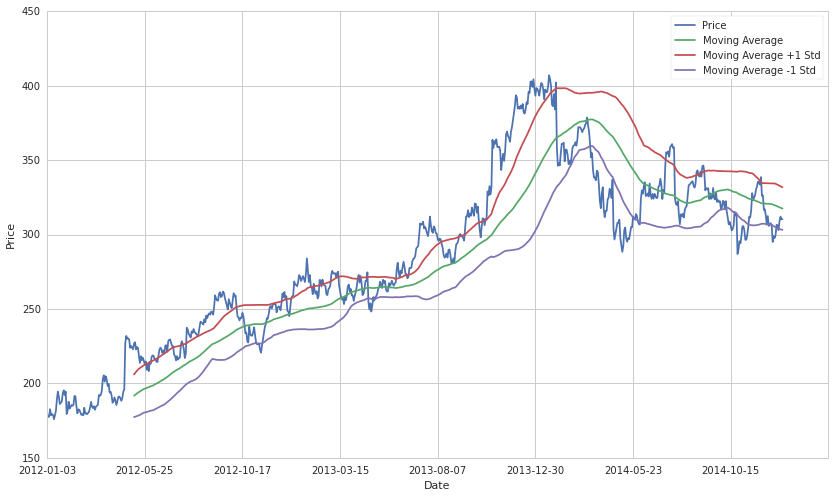

In [12]:
# 绘制原始数据
_, ax3 = plt.subplots()
ax3.plot(pricing)
ax3.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates

# 绘制布林带
ax3.plot(mu)
ax3.plot(mu + std)
ax3.plot(mu - std);
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Price', 'Moving Average', 'Moving Average +1 Std', 'Moving Average -1 Std'])

#### 总结
每当我们在计算数据集的参数时，也要一并计算参数的波动率。否则，我们不知道新的数据是否能够如预期那样与此参数保持一致。 比较好的计算波动率的方式是，将数据划分成不同的子集，并对每一个子集进行参数估计，然后找出结果之间的变化。在我们的样本时间序列之后，可能会有一些我们无法预料的外部因素被引入。然而对于标准误差的不稳定性分析和检验仍然非常有用，它可以告诉我们应该在多大程度上怀疑我们的估计。